[My Christmas Gift: Mandelbrot Set Computation In Python](https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift?lang=en)

[How To Quickly Compute The Mandelbrot Set In Python](https://www.ibm.com/developerworks/community/blogs/jfp/entry/How_To_Compute_Mandelbrodt_Set_Quickly?lang=en)
* https://gist.github.com/jfpuget/60e07a82dece69b011bb

In [ ]:
import numpy as np
from numba import jit
 

@jit
def mandelbrot(c,maxiter):
    z = c
    for n in range(maxiter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return 0

@jit
def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width,height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j],maxiter)
    return (r1,r2,n3)

from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline
 

In [34]:
@jit
def mandelbrot2(creal,cimag,maxiter):
    real = creal
    imag = cimag
    for n in range(maxiter):
        real2 = real*real
        imag2 = imag*imag
        if real2 + imag2 > 4.0:
            return n
        imag = 2* real*imag + cimag
        real = real2 - imag2 + creal       
    return 0


@jit
def mandelbrot_set2(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width,height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot2(r1[i],r2[j],maxiter)
    return (r1,r2,n3)

In [10]:
def mandelbrot_image(xmin,xmax,ymin,ymax,width=10,height=10,maxiter=256,image_id=1):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    ax.imshow(z.T,origin='lower') 
    
    save_image(fig, image_id)
    
def save_image(fig, image_id = 1):
    # global image_counter
    filename = "mandelbrodt_%d.png" % image_id
    fig.savefig(filename)

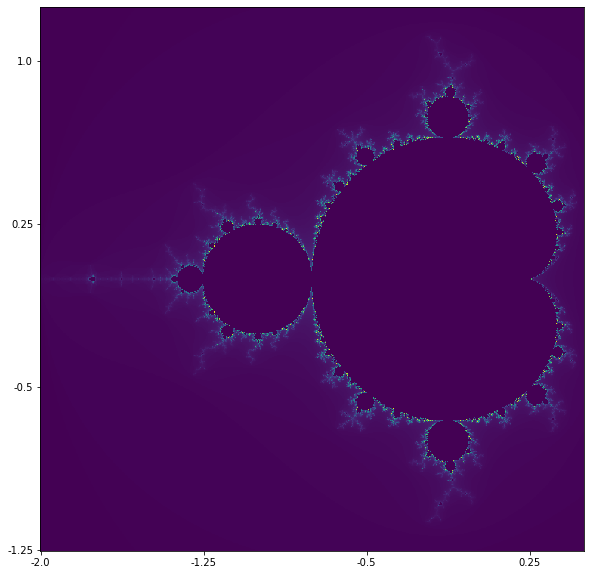

In [11]:
mandelbrot_image(-2.0,0.5,-1.25,1.25)

In [15]:
!dir

 Volume in drive D is Local Disk
 Volume Serial Number is A4B8-F92C

 Directory of D:\zapme\Index\Gong_Wen_Guang\projects\py4kids\lesson-21-math

01/19/2020  07:33 PM    <DIR>          .
01/19/2020  07:33 PM    <DIR>          ..
01/19/2020  07:07 PM    <DIR>          .ipynb_checkpoints
01/19/2020  11:54 AM         4,989,861 Imagination.ipynb
01/19/2020  07:30 PM            77,860 mandelbrodt_1.png
01/19/2020  07:33 PM            61,111 mandelbrodt_10.png
01/19/2020  07:33 PM           105,118 Mandelbrot-Set.ipynb
               4 File(s)      5,233,950 bytes
               3 Dir(s)  7,710,871,756,800 bytes free


In [17]:
def mandelbrot_cmap(xmin,xmax,ymin,ymax,width=10,height=10,maxiter=80,cmap='jet',image_id=10):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    ax.set_title(cmap)
    
    ax.imshow(z.T,cmap=cmap,origin='lower') 
    
    save_image(fig, image_id)

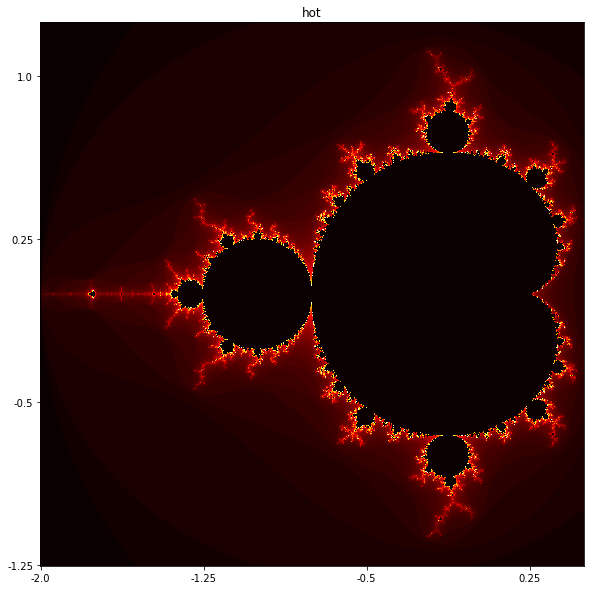

In [18]:
mandelbrot_cmap(-2.0,0.5,-1.25,1.25,cmap='hot')

In [36]:
def mandelbrot_cmap2(xmin,xmax,ymin,ymax,width=10,height=10,\
                     maxiter=80,cmap='jet',gamma=0.3):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    
    x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    # x,y,z = mandelbrot_set2(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    ax.set_title(cmap)
    
    norm = colors.PowerNorm(gamma)
    ax.imshow(z.T,cmap=cmap,origin='lower',norm=norm)  

Wall time: 50.6 ms


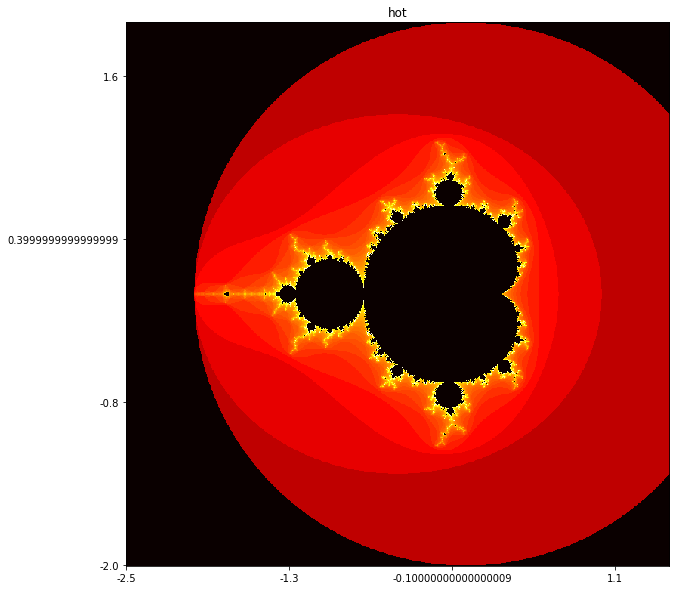

In [37]:
%time mandelbrot_cmap2(-2.5,1.5,-2,2,cmap='hot')   # 233ms

Wall time: 282 ms


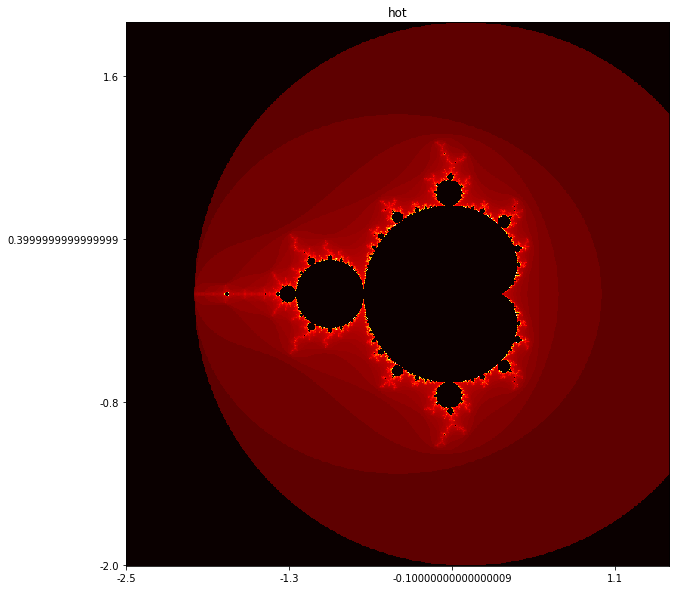

In [38]:
%time mandelbrot_cmap2(-2.5,1.5,-2,2,cmap='hot',maxiter=1024)

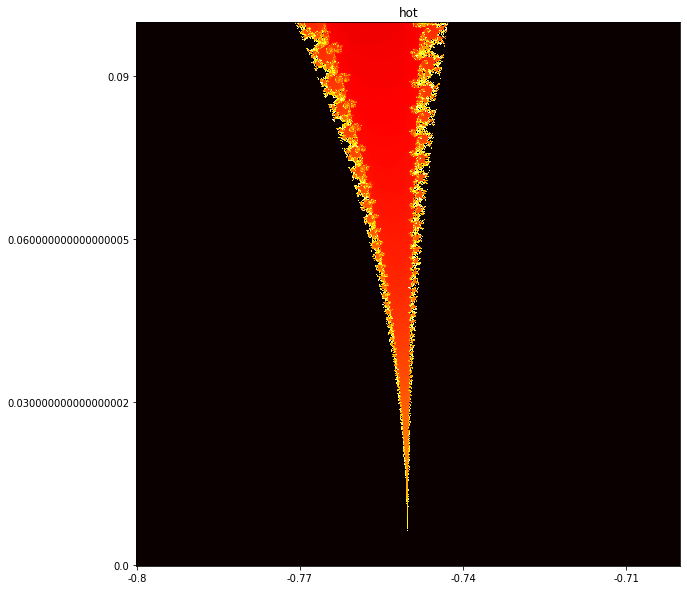

In [24]:
# zoom into valley
mandelbrot_cmap2(-0.8,-0.7,0,0.1,cmap='hot',maxiter=1024)

Wall time: 3.72 s


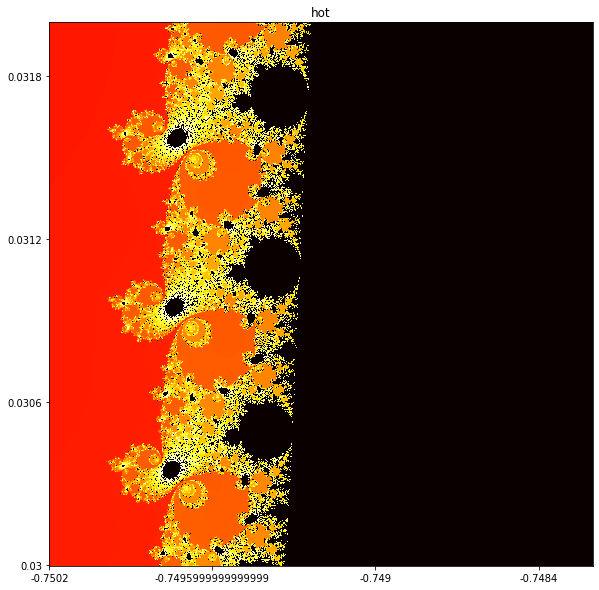

In [39]:
%time mandelbrot_cmap2(-0.7502,-0.7482,0.03,0.032,cmap='hot',maxiter=2048)